In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose



In [21]:
df=pd.read_csv('cleaned_unemployment_data.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.set_index('Date', inplace=True)  
df.head()

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month,Day
Date,,,,,,,,,
2019-05-31,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural,2019,5,31
2019-06-30,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural,2019,6,30
2019-07-31,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural,2019,7,31
2019-08-31,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural,2019,8,31
2019-09-30,Andhra Pradesh,Monthly,5.17,12256762.0,44.68,Rural,2019,9,30


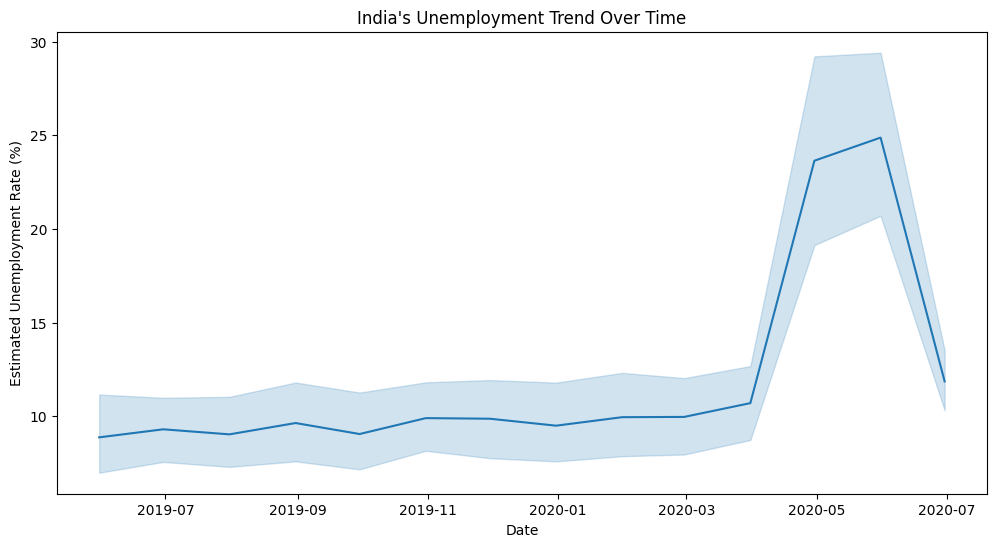

In [10]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.title("India's Unemployment Trend Over Time")
plt.show()


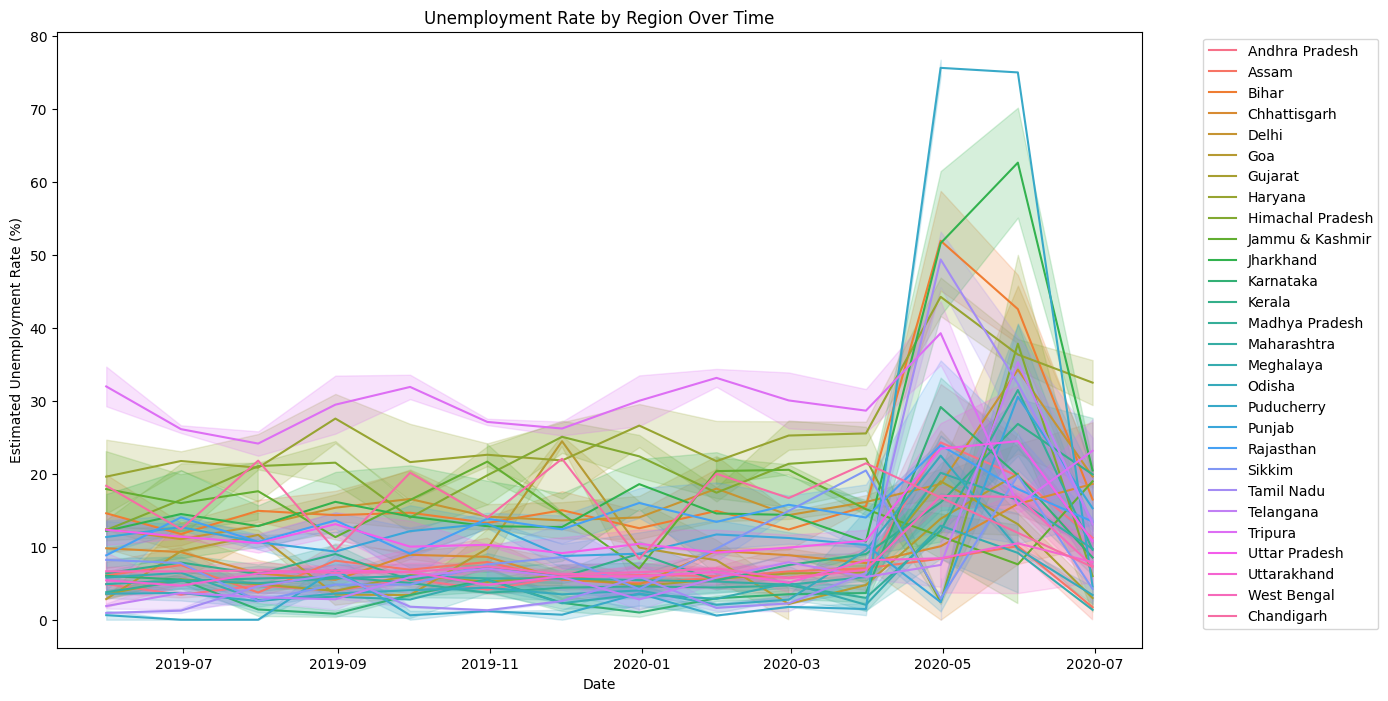

In [11]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Unemployment Rate by Region Over Time')
plt.show()


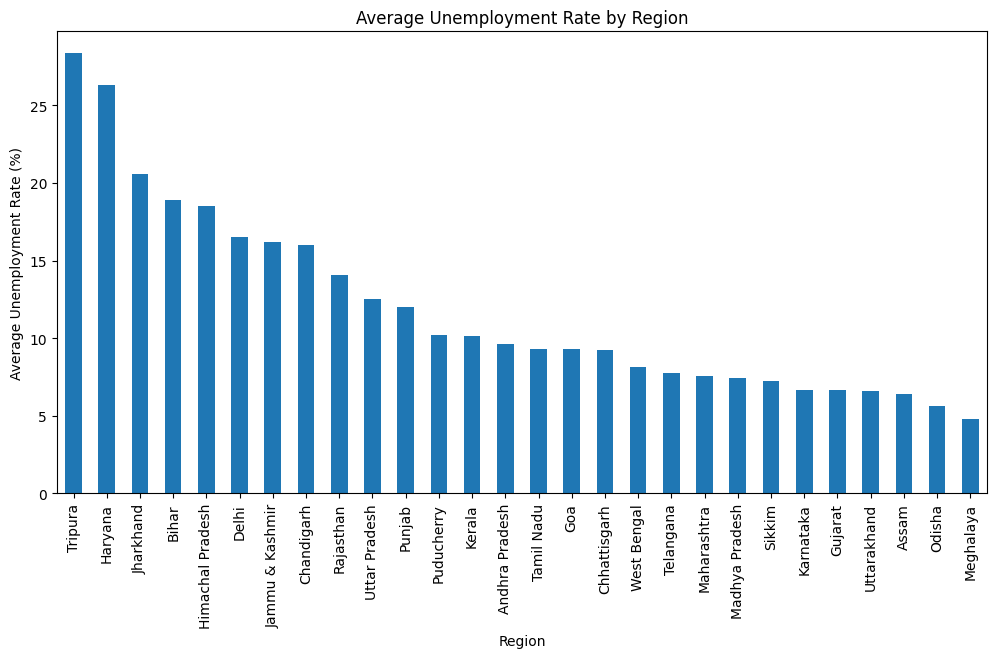

In [12]:
region_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
region_avg.plot(kind='bar', figsize=(12,6))
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Average Unemployment Rate by Region')
plt.show()


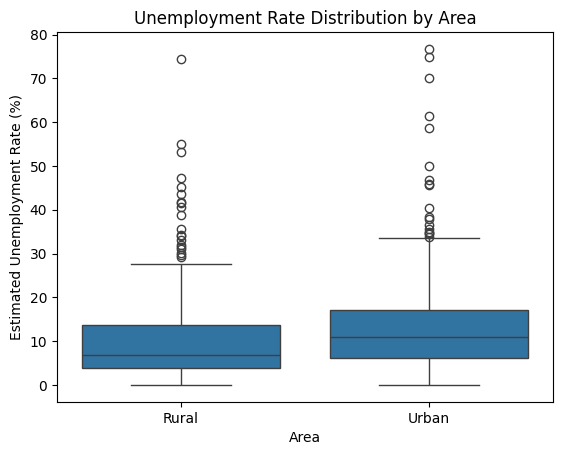

In [13]:
sns.boxplot(data=df, x='Area', y='Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Distribution by Area')
plt.show()


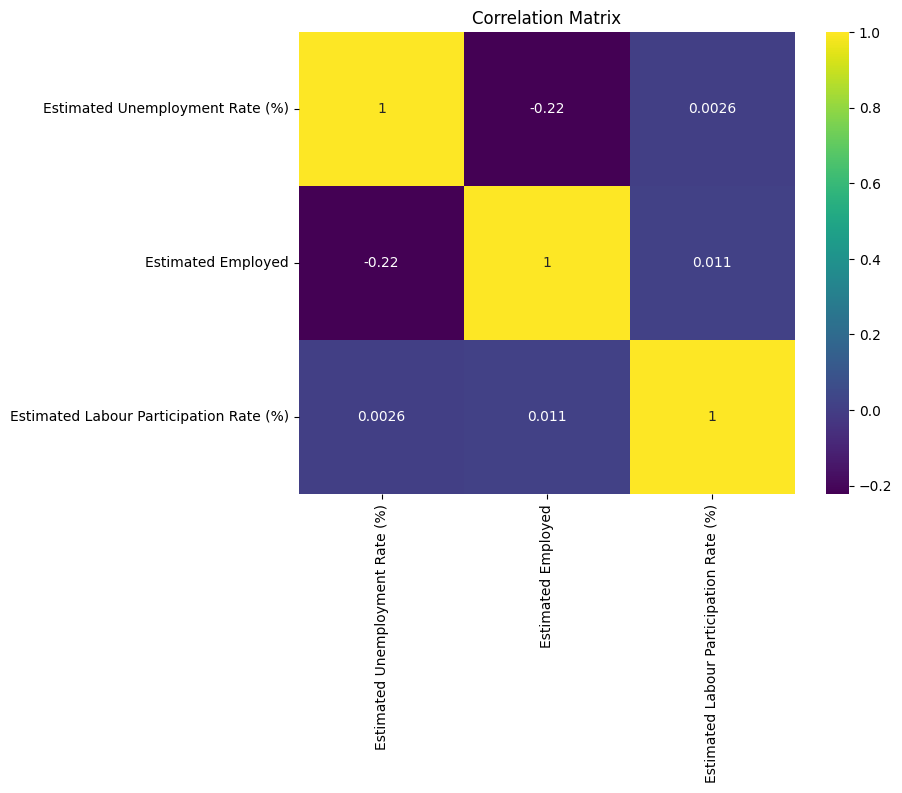

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.xticks(rotation=90) 
plt.show()


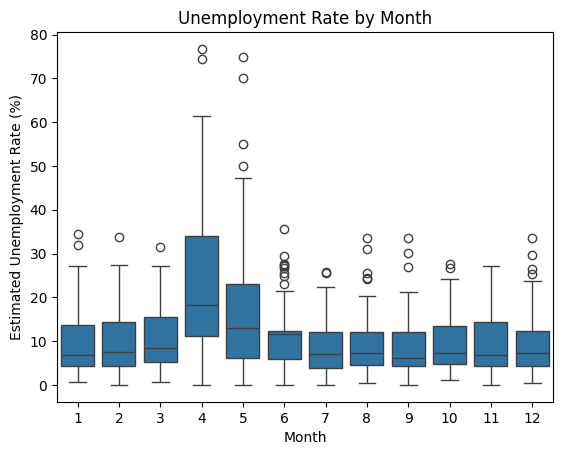

In [23]:

sns.boxplot(data=df, x='Month', y='Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by Month')
plt.show()